<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/RandomForest_0416.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 62.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import zipfile
import os
import glob
import cv2
import rasterio
from rasterio.plot import show
from sklearn.model_selection import train_test_split
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.utils import normalize
from keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.image import resize
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from matplotlib.colors import Normalize, ListedColormap, BoundaryNorm

### Experiment one: one year of images

In [4]:
# directory_path = "/content/drive/MyDrive/data/images/x_training/1year"
# entries = os.listdir(directory_path)
# num_files = len(entries)
# print(f"There are {num_files} files in {directory_path}.")
# directory_path = "/content/drive/MyDrive/data/labels/y_training"
# entries = os.listdir(directory_path)
# num_files = len(entries)
# print(f"There are {num_files} files in {directory_path}.")

In [5]:
# x_file = "/content/drive/MyDrive/data/images/x_training/1year/235_1year.tif"
# y_file = "/content/drive/MyDrive/data/labels/y_training/235_multi_wl.tif"

### Lets look at one image file and it's matching label file

In [6]:
# with rasterio.open(y_file) as src:
#     y_data = src.read().transpose(1, 2, 0)
#     y_meta = src.profile
#     y_meta = src.profile
#     print(y_meta)
#     print(y_data.shape)
#     print(np.unique(y_data))
#     print(y_data.min())
#     print(y_data.max())
#     plt.imshow(y_data)
#     plt.title('y-data')
#     plt.xlabel('Column #')
#     plt.ylabel('Row #')
#     plt.show()

In [7]:
# with rasterio.open(x_file) as src:
#     x_data = src.read().transpose(1, 2, 0)
#     red = src.read(1).astype(float)
#     green = src.read(2).astype(float)
#     blue = src.read(3).astype(float)
#     red_scaled = np.clip(red * scale_factor, 0, 255)
#     green_scaled = np.clip(green * scale_factor, 0, 255)
#     blue_scaled = np.clip(blue * scale_factor, 0, 255)
#     x_datamerge = np.stack((red_scaled, green_scaled, blue_scaled), axis=-1).astype(np.uint8)
#     x_meta = src.profile
#     print(x_meta)
#     print(x_data.shape)
#     print(x_data.min())
#     print(x_data.max())
#     plt.imshow(x_datamerge)
#     plt.title('x-data')
#     plt.xlabel('Column #')
#     plt.ylabel('Row #')
#     plt.show()


### Lets get into splitting the data into training and testing. There are 199 total tiles. By splitting the data into 80% training and 20% testing, there will be 159 tiles in training, 40 tiles in testing for both x_training and y_training datasets.

In [8]:
# # Ensure the lists are sorted so that images and labels correspond to each other
# x_training = sorted(glob.glob(f"/content/drive/MyDrive/data/images/x_training/1year/*.tif"))
# y_training = sorted(glob.glob(f"/content/drive/MyDrive/data/labels/y_training/*.tif"))


In [9]:
# Split the file paths into training and testing sets (80% train, 20% test)
# x_train, x_test, y_train, y_test = train_test_split(x_training, y_training, test_size=0.2, random_state=20)

In [10]:
# # define subset size
# N = 10
# nu = 2
# subset_x_train = x_train[:N]
# subset_y_train = y_train[:N]
# subset_x_test = x_test[:nu]
# subset_y_test = y_test[:nu]

In [11]:
# print("Subset sizes:")
# print(f"x_train_subset: {len(subset_x_train)}")
# print(f"x_test_subset: {len(subset_x_test)}")
# print(f"y_train_subset: {len(subset_y_train)}")
# print(f"y_test_subset: {len(subset_y_test)}")

In [12]:
# def read_multi_image(file_path):
#     with rasterio.open(file_path) as src:
#       bands = [src.read(i) for i in range(1,5)]

#       image = np.stack(bands, axis=-1)

#       image = image.astype(float)
#       max_value = image.max(axis=(0,1), keepdims=True)
#       min_value = image.min(axis=(0,1), keepdims=True)
#       image = (image - min_value) / (max_value - min_value)

#       return image


In [13]:
# # lets look at one example of the x data
# ex_x_train1 = read_multi_image(subset_x_train[2])

# plt.figure(figsize=(15, 10))
# for i in range(4):
#     plt.subplot(2, 2, i+1)
#     plt.imshow(ex_x_train1[:, :, i], cmap='gray')
#     plt.title(f'Band {i+1}')
#     plt.colorbar()
# plt.tight_layout()
# plt.show()

In [14]:
# # lets read and process image data for the subsets using read_multi_image to convert each path in the subset into useable data array.
# subset_x_train_data = [read_multi_image(file_path) for file_path in subset_x_train]
# subset_x_test_data = [read_multi_image(file_path) for file_path in subset_x_test]

In [15]:
# subset_x_test_data

In [16]:
# def read_image_labels(file_path):
#     with rasterio.open(file_path) as src:
#       label_image = src.read(1) # read the sing band
#       return label_image.astype(np.int32) # ensuring labels are interger type

In [17]:
# ex_y_train1 = read_image_labels(subset_y_train[2])
# ex_y_train1
# plt.imshow(ex_y_train1, cmap='gray')
# plt.colorbar()
# plt.tight_layout()
# plt.show()

In [18]:
# ex_y_test = read_image_labels(subset_y_test[1])
# ex_y_test
# plt.imshow(ex_y_test, cmap='gray')
# plt.colorbar()
# plt.tight_layout()
# plt.show()

In [19]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap, BoundaryNorm
# import numpy as np

# def plot_label_image(label_image, title='Label Image'):
#     # Create a color map with distinct colors for each class
#     # Here, we define a colormap with 7 colors, one for each label class
#     colors = ['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
#     cmap = ListedColormap(colors)

#     # Define the boundaries of each class; since labels are from 1 to 7
#     bounds = np.arange(0.5, 8.5, 1)  # From 0.5 to 7.5 with steps of 1

#     norm = BoundaryNorm(bounds, cmap.N)

#     # Create the plot
#     fig, ax = plt.subplots()
#     cbar = ax.imshow(label_image, cmap=cmap, norm=norm)
#     fig.colorbar(cbar, ticks=np.arange(1, 8), spacing='proportional', ax=ax, shrink=0.8)
#     ax.set_title(title)
#     ax.set_xlabel('Column #')
#     ax.set_ylabel('Row #')
#     plt.show()

In [20]:
# plot_label_image(ex_y_train1)

# Necessary blocks of code (to the pause)

### Running Random Forest





In [34]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Ensure the lists are sorted so that images and labels correspond to each other
x_training = sorted(glob.glob(f"/content/drive/MyDrive/data/images/x_training/1year/*.tif"))
y_training = sorted(glob.glob(f"/content/drive/MyDrive/data/labels/y_training/*.tif"))

In [22]:
# Split the file paths into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_training, y_training, test_size=0.2, random_state=20)

In [26]:
# randomly select files for the subset to practice on
N = 10
nu = 2

random_train_indices = np.random.choice(len(x_train), N, replace=False)
random_test_indices = np.random.choice(len(x_test), nu, replace=False)

# Subset the data using these random indices
subset_x_train = [x_train[i] for i in random_train_indices]
subset_y_train = [y_train[i] for i in random_train_indices]
subset_x_test = [x_test[i] for i in random_test_indices]
subset_y_test = [y_test[i] for i in random_test_indices]

In [27]:
subset_x_test

['/content/drive/MyDrive/data/images/x_training/1year/794_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/1611_1year.tif']

In [28]:
subset_y_test

['/content/drive/MyDrive/data/labels/y_training/794_multi_wl.tif',
 '/content/drive/MyDrive/data/labels/y_training/1611_multi_wl.tif']

In [70]:
subset_x_train


['/content/drive/MyDrive/data/images/x_training/1year/840_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/209_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/810_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/743_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/744_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/1610_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/860_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/1489_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/865_1year.tif',
 '/content/drive/MyDrive/data/images/x_training/1year/798_1year.tif']

In [30]:
def read_multi_image(file_path):
    with rasterio.open(file_path) as src:
      bands = [src.read(i) for i in range(1,5)]

      image = np.stack(bands, axis=-1)

      image = image.astype(float)
      max_value = image.max(axis=(0,1), keepdims=True)
      min_value = image.min(axis=(0,1), keepdims=True)
      image = (image - min_value) / (max_value - min_value)

      return image

In [31]:
def read_image_labels(file_path):
    with rasterio.open(file_path) as src:
      label_image = src.read(1) # read the sing band
      return label_image.astype(np.int32) # ensuring labels are interger type

In [32]:
# lets read and process image data for the subsets using read_multi_image to convert
# each path in the subset into useable data array for x and y data

subset_x_train_data = [read_multi_image(file_path) for file_path in subset_x_train]
subset_x_test_data = [read_multi_image(file_path) for file_path in subset_x_test]
subset_y_train_data = [read_image_labels(file_path) for file_path in subset_y_train]
subset_y_test_data = [read_image_labels(file_path) for file_path in subset_y_test]


In [35]:
# # Example: Check the first element to see its unique values and shape
# print("Unique labels in first y_train image:", np.unique(subset_y_train_data[5]))
# print("Shape of first y_train image:", subset_y_train_data[0].shape)

In [36]:
# RF expects 2D array like this: (n_samples, n_features) = (10, 589824)
# and the target to be 1D like this: (n_samples)
# Need to reshape image data (features) and flatten albel data (tagerts)

x_train_flatten = np.array([img.flatten() for img in subset_x_train_data])
x_test_flatten = np.array([img.flatten() for img in subset_x_test_data])
y_train_flatten = np.array([img.flatten() for img in subset_y_train_data])
y_test_flatten = np.array([img.flatten() for img in subset_y_test_data])

In [37]:
print(x_train_flatten.shape)
print(x_test_flatten.shape)
print(y_train_flatten.shape)
print(y_test_flatten.shape)

(10, 589824)
(2, 589824)
(10, 147456)
(2, 147456)


In [38]:
y_train_flatten # was not 1D flat

array([[7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       ...,
       [7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7]], dtype=int32)

Run these next 5 blocks to clalculate weights for later if you need to add class weight suff

In [39]:
# if y_train_flatten.ndim > 1:
#     y_train_flatten = y_train_flatten.flatten()
# y_train_flatten

In [40]:
# unique_classes = np.unique(y_train_flatten)
# print(unique_classes)
# class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train_flatten)
# print(class_weights)

In [41]:
# weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train_flatten), class_weights)}
# weights_dict

In [42]:
# x_train_flatten.shape

In [43]:
# y_train_flatten = np.array([img.flatten() for img in subset_y_train_data])
# y_train_flatten.shape

In [ ]:
# pca = PCA(n_components=10)  # Adjust 'n_components' 10 bc i have 10 images in my
# rf = RandomForestClassifier(n_estimators=100, random_state=30, class_weight=weights_dict, verbose=2)
# pipeline = Pipeline(steps=[('pca', pca), ('random_forest', rf)])
# pipeline.fit(x_train_flatten, y_train_flatten)

In [44]:
# now the classes have a balanced weight distribution - now I need to use these weights in RF classifier.
# below is the updated block of rf to fit the data with the weights

In [46]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Define a PCA transformation that retains enough variance while reducing dimensionality
pca = PCA(n_components=10)  # Adjust 'n_components' 10 bc i have 10 images
rf = RandomForestClassifier(n_estimators=100, random_state=30, verbose=2) # class_weight="balanced"
pipeline = Pipeline(steps=[('pca', pca), ('random_forest', rf)])

In [47]:
pipeline.fit(x_train_flatten, y_train_flatten)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.5min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('random_forest',
                 RandomForestClassifier(random_state=30, verbose=2))])

In [48]:
y_pred = pipeline.predict(x_test_flatten)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   43.0s


In [49]:
from sklearn.metrics import classification_report, accuracy_score

In [58]:
y_pred_flatten = y_pred.flatten() if y_pred.ndim > 1 else y_pred
y_test_flatten = y_test_flatten.flatten() if y_test_flatten.ndim > 1 else y_test_flatten

In [60]:
print(classification_report(y_test_flatten, y_pred_flatten))
print("Accuracy:", accuracy_score(y_test_flatten, y_pred_flatten))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00    103122
           2       0.00      0.00      0.00     12841
           3       0.00      0.00      0.00      2234
           4       0.00      0.00      0.00     32251
           5       0.00      0.00      0.00     12815
           6       0.00      0.00      0.00     12736
           7       0.40      1.00      0.57    118913

    accuracy                           0.40    294912
   macro avg       0.06      0.14      0.08    294912
weighted avg       0.16      0.40      0.23    294912

Accuracy: 0.4032151963975694


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.metrics import hamming_loss, jaccard_score
print("Hamming Loss:", hamming_loss(y_test_flatten, y_pred_flatten))
print("Jaccard Score:", jaccard_score(y_test_flatten, y_pred_flatten, average='macro'))  # 'macro' average for multiclass

Hamming Loss: 0.5967848036024306
Jaccard Score: 0.05760217091393849


In [68]:
# visualize the prediction
# reshape prediction and true labels back to image format
y_test_image = y_test_flatten.reshape(-1, 384, 384)  # Reshape to (num_images, height, width)
y_pred_image = y_pred.reshape(-1, 384, 384)

# Select the first image for visualization
first_test_image = y_test_image[0]
first_pred_image = y_pred_image[0]

snd_test_image = y_test_image[1]
snd_pred_image = y_pred_image[1]

In [66]:
# plot function

def plot_comparison(true_img, pred_img, title_true="True Labels", title_pred="Predicted Labels"):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(true_img, cmap='viridis')  # Change colormap as needed
    plt.colorbar()
    plt.title(title_true)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(pred_img, cmap='viridis')  # Change colormap as needed
    plt.colorbar()
    plt.title(title_pred)
    plt.axis('off')

    plt.show()

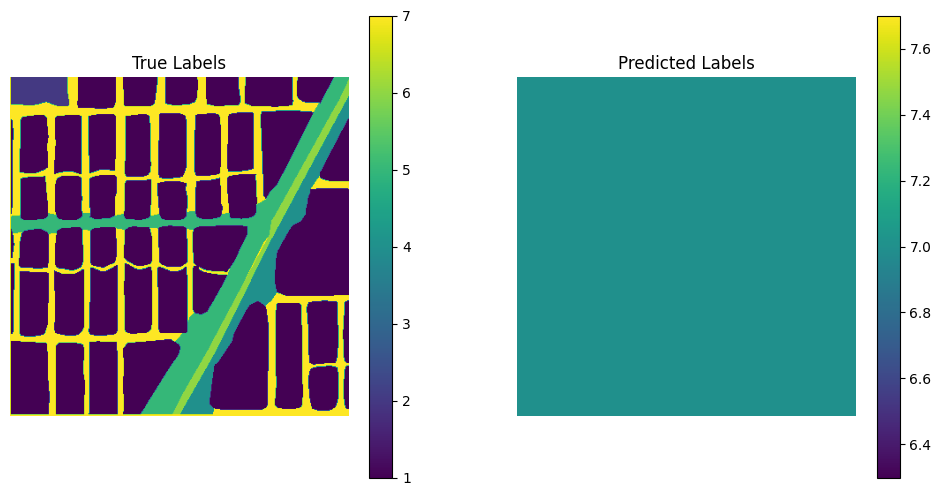

In [67]:
plot_comparison(first_test_image, first_pred_image)

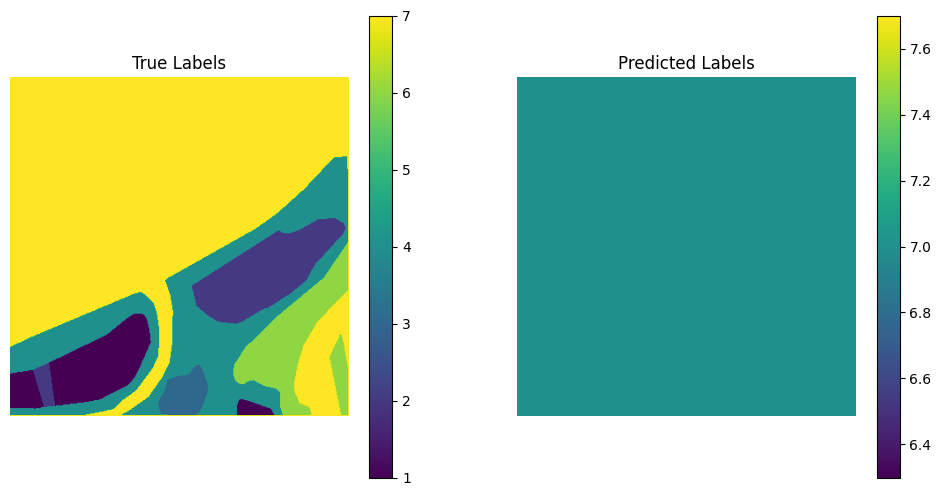

In [69]:
plot_comparison(snd_test_image, snd_pred_image)

In [128]:
# handel class imbalance
# undersample class 7 (other)
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

### lets add a x_train image that was not in training or in test:

In [122]:
image_path = [
    "/content/drive/MyDrive/data/images/x_training/1year/1535_1year.tif",
    "/content/drive/MyDrive/data/images/x_training/1year/1490_1year.tif",
    "/content/drive/MyDrive/data/images/x_training/1year/204_1year.tif"
]
label_path = [
    "/content/drive/MyDrive/data/labels/y_training/1535_multi_wl.tif",
    "/content/drive/MyDrive/data/labels/y_training/1490_multi_wl.tif",
    "/content/drive/MyDrive/data/labels/y_training/204_multi_wl.tif"
]

In [123]:
prepared_images = [read_multi_image(path) for path in image_path]
prepared_labels = [read_image_labels(path) for path in label_path]

In [124]:
prepared_images_flat = np.array([img.flatten() for img in prepared_images])
prepared_labels_flat = np.array([img.flatten() for img in prepared_labels])

In [125]:
prepared_images_flat_pred = pipeline.predict(prepared_images_flat)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   44.6s


In [132]:
prepared_images_flat_pred = pipeline.predict(np.array(prepared_images_flat))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   44.7s


In [133]:
# Example of processing predictions
for i, pred in enumerate(prepared_images_flat_pred):
    print(f"Prediction for image {image_path[i]}: {pred}")
    # If needed, reshape prediction back to image shape if it's pixel-wise classification
    # pred_image = pred.reshape((height, width))  # Adjust height and width accordingly


Prediction for image /content/drive/MyDrive/data/images/x_training/1year/1535_1year.tif: [7 7 7 ... 7 7 7]
Prediction for image /content/drive/MyDrive/data/images/x_training/1year/1490_1year.tif: [7 7 7 ... 7 7 7]
Prediction for image /content/drive/MyDrive/data/images/x_training/1year/204_1year.tif: [7 7 7 ... 7 7 7]


In [141]:
prepared_images_flat_pred_flat = prepared_images_flat_pred.flatten() if prepared_images_flat_pred.ndim > 1 else prepared_images_flat_pred


In [139]:
prepared_images_flat_pred_flat.shape

(442368,)

In [142]:
prepared_labels_flat = np.concatenate([label.flatten() for label in prepared_labels])

In [143]:
prepared_labels_flat.shape

(442368,)

In [144]:
print(classification_report(prepared_labels_flat, prepared_images_flat_pred_flat))
print("Accuracy:", accuracy_score(prepared_labels_flat, prepared_images_flat_pred_flat))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      8389
           2       0.00      0.00      0.00    119294
           5       0.00      0.00      0.00       869
           6       0.00      0.00      0.00     51257
           7       0.59      1.00      0.74    262559

    accuracy                           0.59    442368
   macro avg       0.12      0.20      0.15    442368
weighted avg       0.35      0.59      0.44    442368

Accuracy: 0.5935307255497685


In [145]:
prepared_labels_flat_image = prepared_labels_flat.reshape(-1, 384, 384)
prepared_images_flat_pred_flat_image = prepared_images_flat_pred_flat.reshape(-1, 384, 384)

TypeError: Invalid shape () for image data

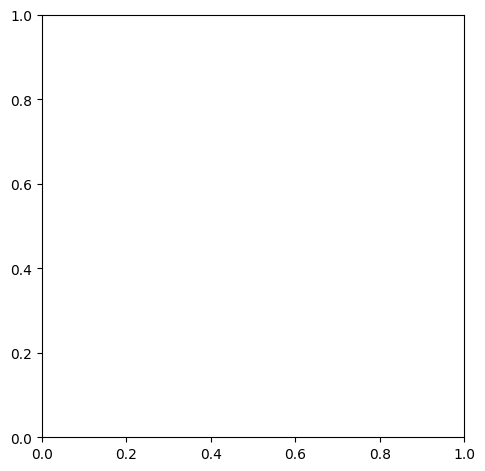

In [148]:
prepared_labels_flat_image = prepared_labels_flat_image[0]
prepared_images_flat_pred_flat_image = prepared_images_flat_pred_flat_image[0]
plot_comparison(prepared_labels_flat_image, prepared_images_flat_pred_flat_image)

In [117]:
# /content/drive/MyDrive/data/images/x_training/1year/1498_1year.tif
new_pred = [read_multi_image("/content/drive/MyDrive/data/images/x_training/1year/1498_1year.tif")]
new_pred_flat = np.array([img.flatten() for img in new_pred])
new_pred_pred = pipeline.predict(new_pred_flat)
new_pred_pred_flat = new_pred_pred.flatten() if new_pred_pred.ndim > 1 else new_pred_pred

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   34.8s


In [118]:
new_y_test = read_image_labels("/content/drive/MyDrive/data/labels/y_training/1498_multi_wl.tif")
new_y_test_flat = new_y_test.flatten() if new_y_test.ndim > 1 else new_y_test

In [119]:
print(classification_report(new_y_test_flat, new_pred_pred_flat))
print("Accuracy:", accuracy_score(new_y_test_flat, new_pred_pred_flat))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     77876
           2       0.00      0.00      0.00     55625
           4       0.00      0.00      0.00      1706
           5       0.00      0.00      0.00      6854
           6       0.00      0.00      0.00      3076
           7       0.02      1.00      0.03      2319

    accuracy                           0.02    147456
   macro avg       0.00      0.17      0.01    147456
weighted avg       0.00      0.02      0.00    147456

Accuracy: 0.015726725260416668


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
new_test_image = new_y_test_flat.reshape(-1, 384, 384)
new_pred_image = new_pred_pred_flat.reshape(-1, 384, 384)

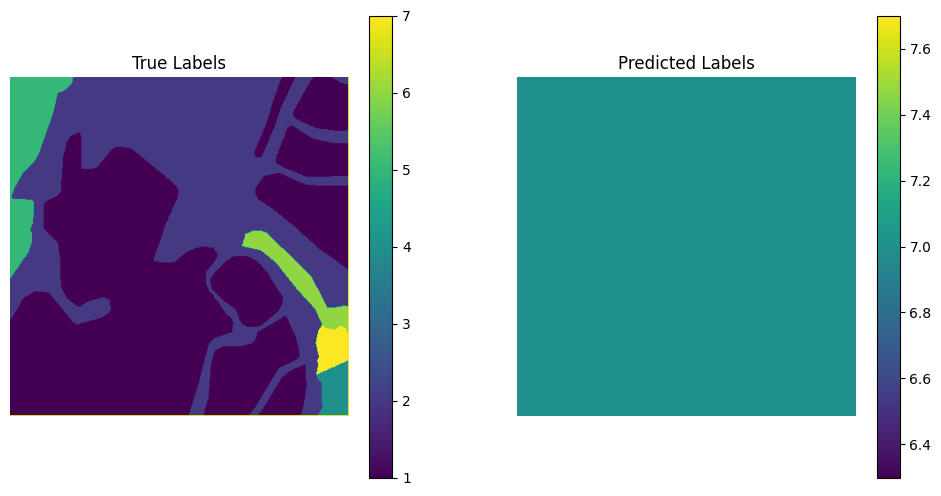

In [121]:
new_test_image = new_test_image[0]
new_pred_image = new_pred_image[0]
plot_comparison(new_test_image, new_pred_image)

### testing


In [ ]:
from rasterio.plot import reshape_as_raster, reshape_as_image

In [ ]:
img = rasterio.open("/content/drive/MyDrive/data/images/x_training/1year/235_1year.tif")
print(img.shape)
show(img)

In [ ]:
full_img = img.read()
print(full_img.shape)

In [ ]:
num_bands = img.count
print("Number of bands in the image = ", num_bands)

In [ ]:
img_band1 = img.read(1)
img_band2 = img.read(2)
img_band3 = img.read(3)
img_band4 = img.read(4)
img_band5 = img.read(5)
print(img_band1.shape)
print(img_band2.shape)
print(img_band3.shape)
print(img_band4.shape)
print(img_band5.shape)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_band1, cmap = 'gray')
ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(img_band2, cmap = 'gray')
ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(img_band3, cmap = 'gray')
ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(img_band4, cmap = 'gray')
ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(img_band5, cmap = 'gray')
plt.show()

In [ ]:
rgb_img = img.read([1,2,3])
print(rgb_img.shape)

In [ ]:
rgbn_img = img.read([1,2,3,4])
print(rgbn_img.shape)

In [ ]:
print("Coordinate reference system: ", img.crs)

In [ ]:
metadata = img.meta
print("Metadata: {metadata}\n".format(metadata=metadata))

In [ ]:
desc = img.descriptions
print("Description: {desc}\n".format(desc=desc))

In [ ]:
print("Geotransform : ", img.transform)

In [ ]:
rasterio.plot.show_hist(rgbn_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

In [ ]:
clipped_img = rgbn_img[:, 300:900, 300:900]
print(clipped_img.shape)

In [ ]:
plt.imshow(clipped_img[0,:,:])

In [ ]:
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.3, stacked=False, alpha=0.3)

In [ ]:
red_clipped = clipped_img[0].astype('float32')
green_clipped = clipped_img[1].astype('float32')
blue_clipped = clipped_img[2].astype('float32')
nir_clipped = clipped_img[3].astype('float32')

ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)


In [ ]:
plt.imshow(ndvi_clipped)